Build a regression model.

Data to use is data_joined_new that has been cleaned. do another check just to confirm

In [96]:
# Importing the required libraries for EDA

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import statsmodels.api as sm
import seaborn
seaborn.set()
import warnings
warnings.filterwarnings("ignore")

In [58]:
# Load dataframe
bld_reg = pd.read_csv(r'C:\Code\Project_Stat_Model_DataFrame_Store\comb2_sql_df.csv')

bld_reg.head()

,Unnamed: 0,Yelp ID,Categories,Distance,Latitude,Longitude,Address,Foursquare ID,City,Name,Rating,ll,Country,Station Name,Total Bikes
0,0,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",509954d6e4b062b9e44f4a05,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
1,1,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",5bfd2632829b0c002c26ee69,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
2,2,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4c4ebd92ea24c9b635a12016,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
3,3,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4bdf0c4e7ea362b5e64943c4,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20
4,4,rLOYRsuqZTd6ESYkG1dEmg,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",4de28e5945dd180ae5494bf8,Lille,La Terrasse du Parc,4.0,"50.63599,3.13566",FR,CHATELLENIE,20


In [59]:
bld_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93700 entries, 0 to 93699
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     93700 non-null  int64  
 1   Yelp ID        93700 non-null  object 
 2   Categories     93700 non-null  object 
 3   Distance       93700 non-null  float64
 4   Latitude       93700 non-null  float64
 5   Longitude      93700 non-null  float64
 6   Address        93700 non-null  object 
 7   Foursquare ID  93700 non-null  object 
 8   City           93700 non-null  object 
 9   Name           93700 non-null  object 
 10  Rating         93700 non-null  float64
 11  ll             93700 non-null  object 
 12  Country        93700 non-null  object 
 13  Station Name   93700 non-null  object 
 14  Total Bikes    93700 non-null  int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 10.7+ MB


In [60]:
bld_reg.shape

(93700, 15)

In [61]:
bld_regx = bld_reg[['Categories', 'Distance', 'Latitude', 'Longitude', 'Address', 'City', 'Name', 'Rating', 'Total Bikes']]
bld_regx

,Categories,Distance,Latitude,Longitude,Address,City,Name,Rating,Total Bikes
0,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,20
1,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,20
2,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,20
3,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,20
4,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,20
...,...,...,...,...,...,...,...,...,...
93695,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,20
93696,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,20
93697,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,20
93698,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,20


In [62]:
bld_regx.shape

(93700, 9)

In [64]:
# Checking for duplicates
duplicate_rows_bld_regx = bld_regx[bld_regx.duplicated()]
print("number of duplicate rows: ", duplicate_rows_bld_regx.shape)

number of duplicate rows:  (84332, 9)


In [66]:
# Create a copy of dataframe
bld_regx_jk = bld_regx.copy()
bld_regx_jk

# bu_reg_x = bu_reg_x.drop_duplicates()
# bu_reg_x.tail()

,Categories,Distance,Latitude,Longitude,Address,City,Name,Rating,Total Bikes
0,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,20
1,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,20
2,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,20
3,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,20
4,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,20
...,...,...,...,...,...,...,...,...,...
93695,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,20
93696,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,20
93697,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,20
93698,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,20


In [67]:
# Checking for duplicates
duplicate_rows_bld_regx_jk = bld_regx_jk[bld_regx_jk.duplicated()]
print("number of duplicate rows: ", duplicate_rows_bld_regx_jk.shape)



number of duplicate rows:  (84332, 9)


In [68]:
# Drop duplicates
bld_regx_jk = bld_regx_jk.drop_duplicates()
bld_regx_jk.tail()

,Categories,Distance,Latitude,Longitude,Address,City,Name,Rating,Total Bikes
93650,"French, Venues & Event Spaces, Caterers",948.84,50.64,3.14,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",Villeneuve d'Ascq,Brasserie 99,2.0,20
93660,Brasseries,855.76,50.64,3.12,"138 rue Jules Guesde, 59650 Villeneuve-d'Ascq,...",Villeneuve-d'Ascq,Le Zythologue,2.0,20
93670,Food Stands,614.36,50.63,3.13,"Rue Alexandre Detroy, 59650 Villeneuve-d'Ascq,...",Villeneuve-d'Ascq,Friterie du Bourg,3.0,20
93680,French,941.37,50.64,3.15,"1 allée du musée, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Culin'r,3.0,20
93690,"Cafes, Fast Food, Car Dealers, Coffee & Tea",1049.74,50.64,3.12,"Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Mercedes Café,3.0,20


In [69]:
# Checking for duplicates
duplicate_rows_bld_regx_jk = bld_regx_jk[bld_regx_jk.duplicated()]
print("number of duplicate rows: ", duplicate_rows_bld_regx_jk.shape)

number of duplicate rows:  (0, 9)


In [70]:
bld_regx = bld_regx_jk
bld_regx

,Categories,Distance,Latitude,Longitude,Address,City,Name,Rating,Total Bikes
0,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,20
10,"Coffee & Tea, Breakfast & Brunch",816.65,50.63,3.07,"151 rue de Paris, 59800 Lille, France",Lille,Coffee Makers,4.5,20
20,French,115.09,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,Les Hauts de Lille,4.0,20
30,"Steakhouses, Barbeque",628.17,50.64,3.07,"13 rue Sainte-Anne, 59800 Lille, France",Lille,Grill Sainte-Anne,4.5,20
40,Greek,937.10,50.64,3.07,"86 rue de Gand, 59000 Lille, France",Lille,L'Ile de Crète,4.5,20
...,...,...,...,...,...,...,...,...,...
93650,"French, Venues & Event Spaces, Caterers",948.84,50.64,3.14,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",Villeneuve d'Ascq,Brasserie 99,2.0,20
93660,Brasseries,855.76,50.64,3.12,"138 rue Jules Guesde, 59650 Villeneuve-d'Ascq,...",Villeneuve-d'Ascq,Le Zythologue,2.0,20
93670,Food Stands,614.36,50.63,3.13,"Rue Alexandre Detroy, 59650 Villeneuve-d'Ascq,...",Villeneuve-d'Ascq,Friterie du Bourg,3.0,20
93680,French,941.37,50.64,3.15,"1 allée du musée, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Culin'r,3.0,20


In [71]:
del bld_regx_jk

In [72]:
# Checking for missing or null values.

print("\nMissing Values:")
print(bld_regx.isnull().sum())   # Before dropping the values


Missing Values:
Categories     0
Distance       0
Latitude       0
Longitude      0
Address        0
City           0
Name           0
Rating         0
Total Bikes    0
dtype: int64


In [74]:
bld_regx.shape

(9368, 9)

No missing values

In [107]:
bld_regx.describe()

,Distance,Latitude,Longitude,Rating,Total Bikes
count,9368.000000,9368.000000,9368.000000,9368.000000,9368.0
mean,674.414488,50.641814,3.085436,3.891919,20.0
std,338.908231,0.022915,0.046140,0.671788,0.0
min,3.150000,50.600000,2.980000,2.000000,20.0
25%,378.565000,50.630000,3.060000,3.500000,20.0
50%,704.625000,50.640000,3.070000,4.000000,20.0
75%,956.192500,50.650000,3.120000,4.500000,20.0
max,1803.950000,50.700000,3.230000,5.000000,20.0


# EXPLORATORY DATA ANALYSIS

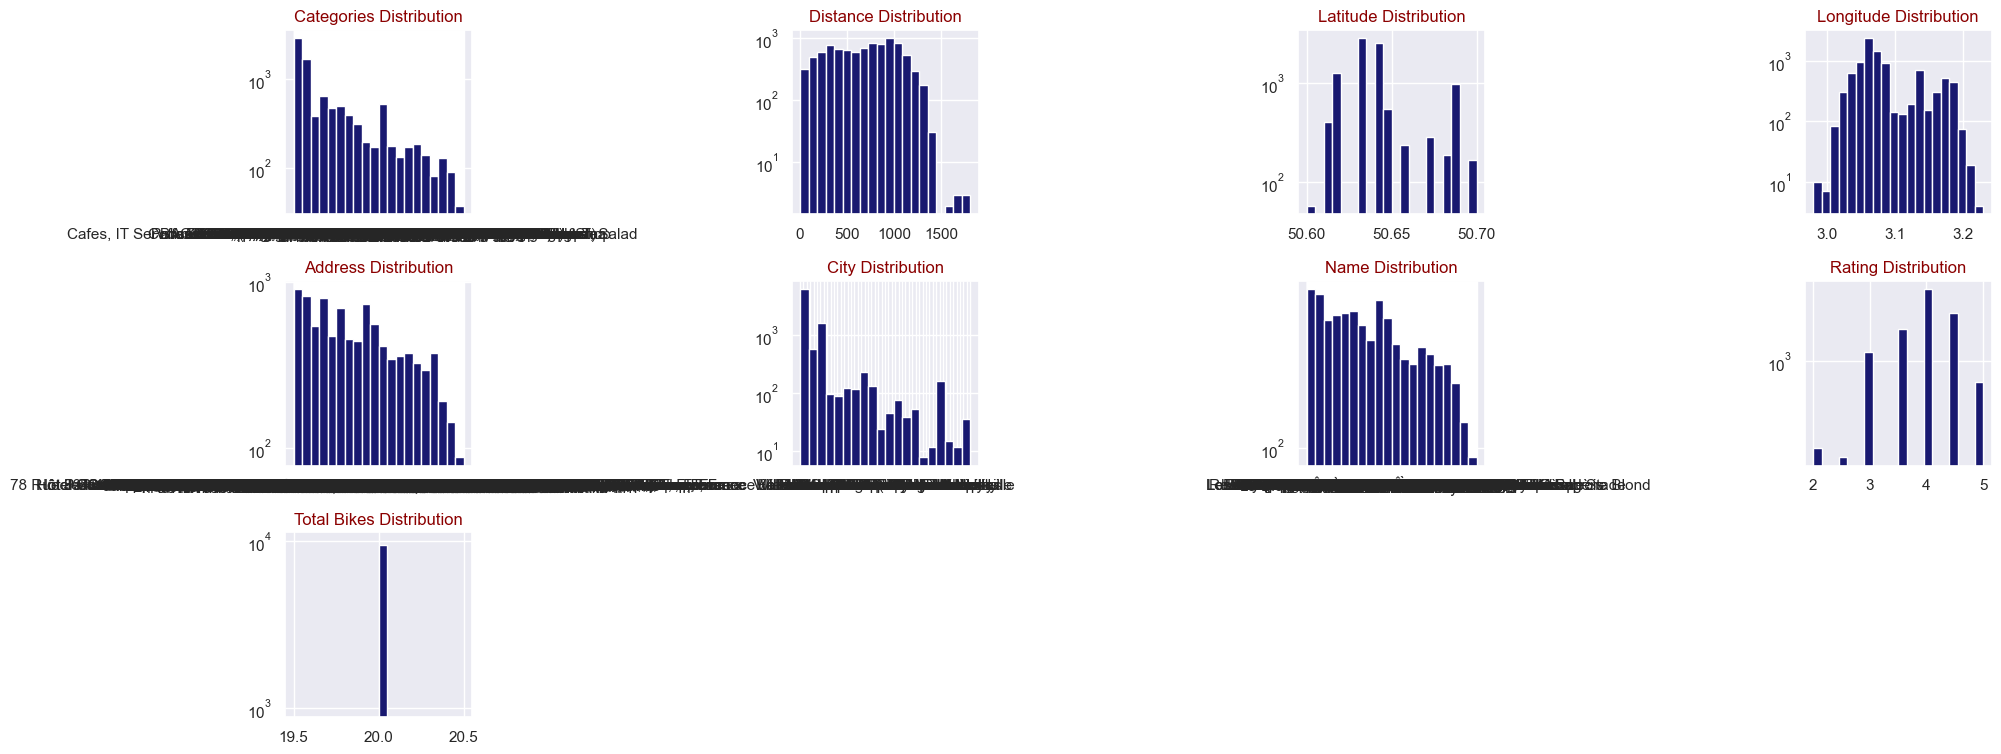

In [97]:
# Histogram distribution for dataframe
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(bld_regx,bld_regx.columns,8,4)

In [76]:
bld_regx['Total Bikes'].value_counts()

20    9368
Name: Total Bikes, dtype: int64

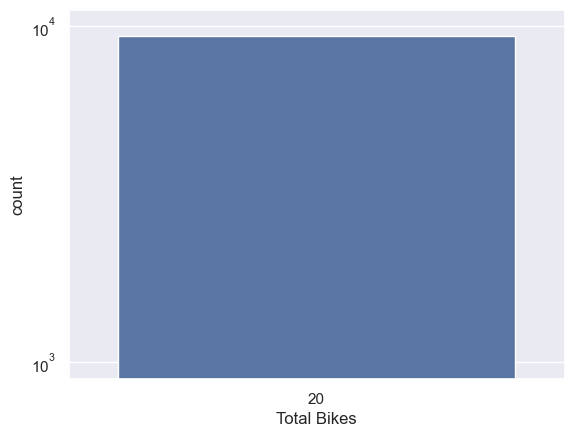

In [98]:
ax=sns.countplot(x='Total Bikes',data=bld_regx);
ax.set_yscale('log')

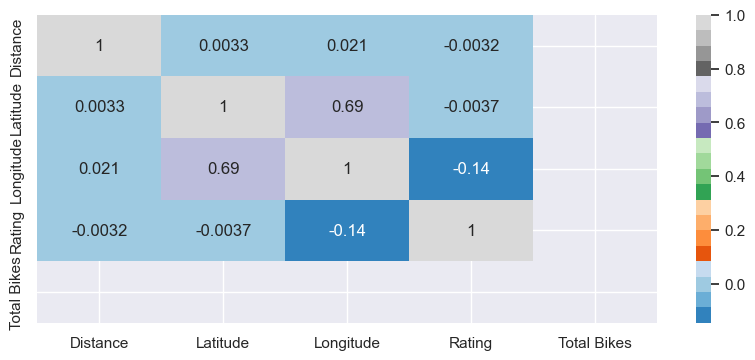

In [99]:
plt.figure(figsize = (10,4))
sns.heatmap(bld_regx.corr(), annot = True, cmap="tab20c")
plt.show()

In [100]:
bld_regx.columns

Index(['Categories', 'Distance', 'Latitude', 'Longitude', 'Address', 'City',
       'Name', 'Rating', 'Total Bikes'],
      dtype='object')

In [79]:
#Dropping 
estimators=['Categories', 'Distance', 'Latitude', 'Longitude', 'Address', 'City', 'Name', 'Rating']

X1 = bld_regx[estimators]
y = bld_regx['Total Bikes']

In [106]:
col=X1.columns[:-1]
col

Index([], dtype='object')

In [102]:
X = sm.add_constant(X1)
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const       float64
Category     object
dtype: object. The data was
Total Bikes
and
    const Category
0    1.0        A
1    1.0        B
2    1.0        A
3    1.0        C
4    1.0        B
5    1.0        C
before. After,
Total Bikes
[[1.0 'A']
 [1.0 'B']
 [1.0 'A']
 [1.0 'C']
 [1.0 'B']
 [1.0 'C']].

In [83]:
results_logit.summary()

NameError: name 'results_logit' is not defined

In [87]:
import statsmodels.api as sm

# Define your dependent variable (binary outcome, e.g., 0 or 1) and independent variables
y = bld_regx['Total Bikes']  # Replace 'BinaryOutcome' with the actual column containing binary outcomes
X = bld_regx[['Rating', 'Distance']]  # Add all relevant independent variables

# Add a constant term for the intercept in the logistic regression model
X = sm.add_constant(X)

# Build the logistic regression model
logit_model = sm.Logit(y, X).fit()

# Interpret and print the results
print(logit_model.summary())


ValueError: endog must be in the unit interval.

In [88]:
# Create a copy of dataframe
bld_regx_dm = bld_regx.copy()
bld_regx_dm

,Categories,Distance,Latitude,Longitude,Address,City,Name,Rating,Total Bikes
0,French,136.08,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,La Terrasse du Parc,4.0,20
10,"Coffee & Tea, Breakfast & Brunch",816.65,50.63,3.07,"151 rue de Paris, 59800 Lille, France",Lille,Coffee Makers,4.5,20
20,French,115.09,50.64,3.08,"Hôtel Casino Barrière de Lille, 777 bis pont d...",Lille,Les Hauts de Lille,4.0,20
30,"Steakhouses, Barbeque",628.17,50.64,3.07,"13 rue Sainte-Anne, 59800 Lille, France",Lille,Grill Sainte-Anne,4.5,20
40,Greek,937.10,50.64,3.07,"86 rue de Gand, 59000 Lille, France",Lille,L'Ile de Crète,4.5,20
...,...,...,...,...,...,...,...,...,...
93650,"French, Venues & Event Spaces, Caterers",948.84,50.64,3.14,"99 rue Parmentier, 59650 Villeneuve d'Ascq, Fr...",Villeneuve d'Ascq,Brasserie 99,2.0,20
93660,Brasseries,855.76,50.64,3.12,"138 rue Jules Guesde, 59650 Villeneuve-d'Ascq,...",Villeneuve-d'Ascq,Le Zythologue,2.0,20
93670,Food Stands,614.36,50.63,3.13,"Rue Alexandre Detroy, 59650 Villeneuve-d'Ascq,...",Villeneuve-d'Ascq,Friterie du Bourg,3.0,20
93680,French,941.37,50.64,3.15,"1 allée du musée, 59650 Villeneuve-d'Ascq, France",Villeneuve-d'Ascq,Culin'r,3.0,20


In [89]:
import pandas as pd

# Sample data in X1 with a categorical variable 'Category'
bld_regx_dm = {
    'Category': ['A', 'B', 'A', 'C', 'B', 'C']
}

X1 = pd.DataFrame(bld_regx_dm)

# One-Hot Encoding
X1_onehot = pd.get_dummies(X1, columns=['Category'], prefix=['Category'])

# Label Encoding
from sklearn.preprocessing import LabelEncoder

X1_label = X1.copy()
label_encoder = LabelEncoder()
X1_label['Category'] = label_encoder.fit_transform(X1_label['Category'])

# Display the encoded DataFrames
print("One-Hot Encoding:")
print(X1_onehot)

print("\nLabel Encoding:")
print(X1_label)


One-Hot Encoding:
   Category_A  Category_B  Category_C
0           1           0           0
1           0           1           0
2           1           0           0
3           0           0           1
4           0           1           0
5           0           0           1

Label Encoding:
   Category
0         0
1         1
2         0
3         2
4         1
5         2


In [91]:
import statsmodels.api as sm

# Assuming you have your dependent variable 'y' prepared
y = 'Total Bikes'

# Logistic Regression with One-Hot Encoding
X_onehot = sm.add_constant(X1_onehot)  # Add a constant (intercept)
logit_model_onehot = sm.Logit(y, X_onehot)
results_onehot = logit_model_onehot.fit()
print(results_onehot.summary())

# Logistic Regression with Label Encoding
X_label = sm.add_constant(X1_label)  # Add a constant (intercept)
logit_model_label = sm.Logit(y, X_label)
results_label = logit_model_label.fit()
print(results_label.summary())


TypeError: len() of unsized object

In [94]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.0001):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(bld_regx_dm, bld_regx_dm.Total Bikes, col)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3221613101.py, line 15)

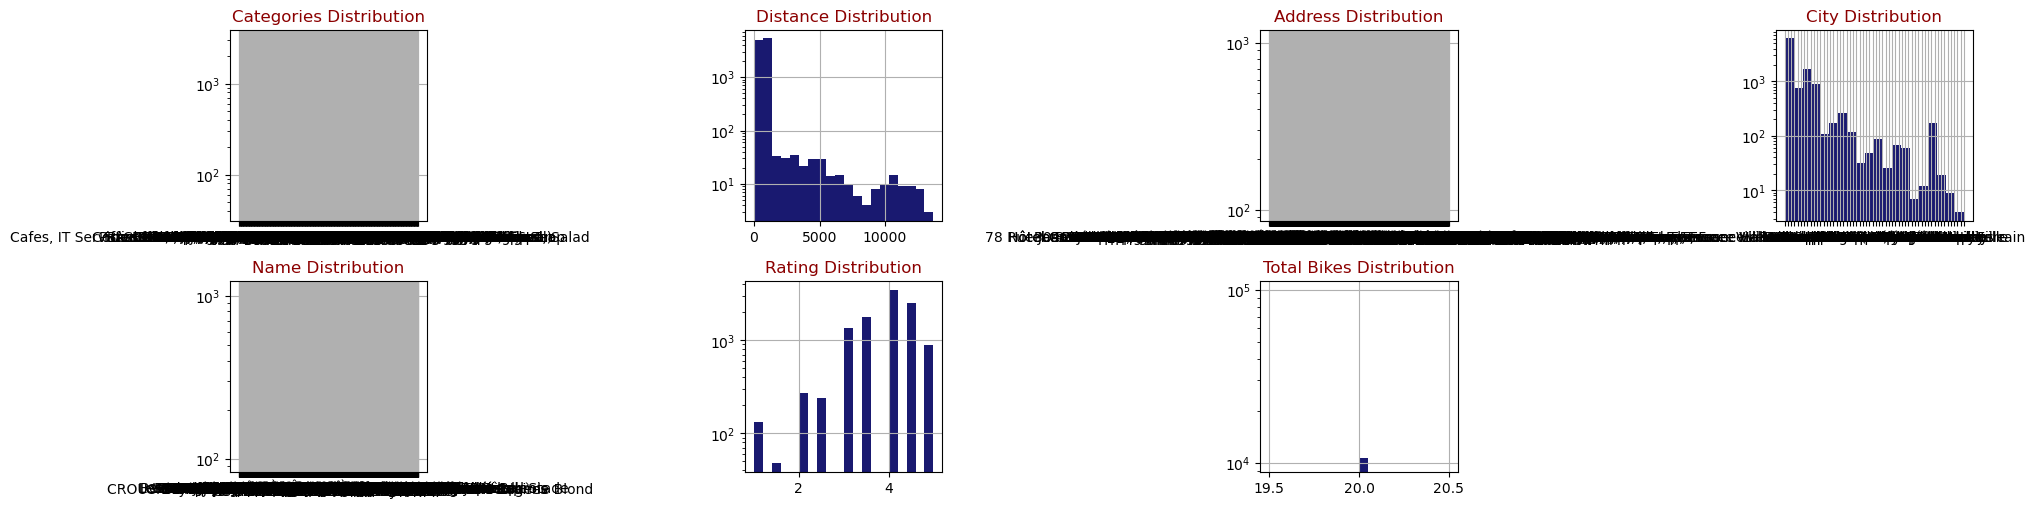

In [18]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(bu_reg,bu_reg.columns,8,4)

In [20]:
bu_reg['Total Bikes'].value_counts()

20    10666
Name: Total Bikes, dtype: int64

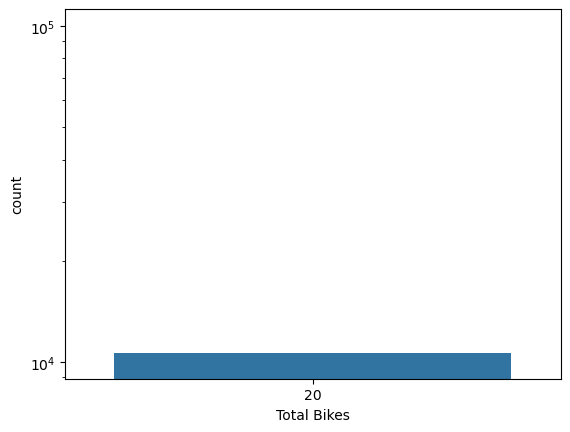

In [21]:
ax=sns.countplot(x='Total Bikes',data=bu_reg);
ax.set_yscale('log')

C:\Users\franc\AppData\Local\Temp\ipykernel_5840\3607057002.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bu_reg.corr(), annot = True, cmap="tab20c")


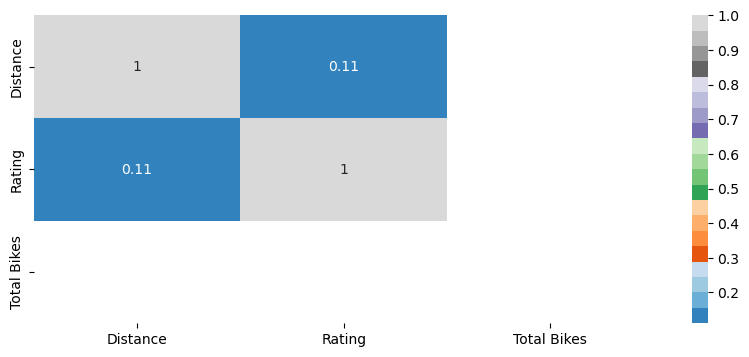

In [23]:
plt.figure(figsize = (10,4))
sns.heatmap(bu_reg.corr(), annot = True, cmap="tab20c")
plt.show()

In [26]:
bu_reg.columns

Index(['Categories', 'Distance', 'Address', 'City', 'Name', 'Rating',
       'Total Bikes'],
      dtype='object')

In [27]:
#Dropping Time as it's non business required data
estimators=[ 'Categories', 'Distance', 'Address', 'City', 'Name', 'Rating']

X1 = bu_reg[estimators]
y = bu_reg['Total Bikes']

In [37]:
col=X1.columns[:]
col

Index(['Categories', 'Distance', 'Address', 'City', 'Name', 'Rating'], dtype='object')

In [38]:
X = sm.add_constant(X1)
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const         float64
Categories     object
Distance      float64
Address        object
City           object
Name           object
Rating        float64
dtype: object. The data was
0        20
1        20
2        20
3        20
4        20
         ..
10663    20
10664    20
10665    20
10666    20
10667    20
Name: Total Bikes, Length: 10666, dtype: int64
and
        const                                   Categories  Distance  \
0        1.0                                       French    136.08   
1        1.0             Coffee & Tea, Breakfast & Brunch    816.65   
2        1.0                                       French    115.09   
3        1.0                        Steakhouses, Barbeque    628.17   
4        1.0                                        Greek    937.10   
...      ...                                          ...       ...   
10663    1.0                                   Brasseries    855.76   
10664    1.0                                  Food Stands    614.36   
10665    1.0                                       French    941.37   
10666    1.0                                   Brasseries    869.14   
10667    1.0  Cafes, Fast Food, Car Dealers, Coffee & Tea   1049.74   

                                                 Address               City  \
0      Hôtel Casino Barrière de Lille, 777 bis pont d...              Lille   
1                  151 rue de Paris, 59800 Lille, France              Lille   
2      Hôtel Casino Barrière de Lille, 777 bis pont d...              Lille   
3                13 rue Sainte-Anne, 59800 Lille, France              Lille   
4                    86 rue de Gand, 59000 Lille, France              Lille   
...                                                  ...                ...   
10663  138 rue Jules Guesde, 59650 Villeneuve-d'Ascq,...  Villeneuve-d'Ascq   
10664  Rue Alexandre Detroy, 59650 Villeneuve-d'Ascq,...  Villeneuve-d'Ascq   
10665  1 allée du musée, 59650 Villeneuve-d'Ascq, France  Villeneuve-d'Ascq   
10666  124 rue Jules Guesde, 59650 Villeneuve-d'Ascq,...  Villeneuve-d'Ascq   
10667     Bd de l'Ouest, 59650 Villeneuve-d'Ascq, France  Villeneuve-d'Ascq   

                      Name  Rating  
0      La Terrasse du Parc     4.0  
1            Coffee Makers     4.5  
2       Les Hauts de Lille     4.0  
3        Grill Sainte-Anne     4.5  
4           L'Ile de Crète     4.5  
...                    ...     ...  
10663        Le Zythologue     2.0  
10664    Friterie du Bourg     3.0  
10665              Culin'r     3.0  
10666            L'Ardoise     1.5  
10667        Mercedes Café     3.0  

[10666 rows x 7 columns]
before. After,
[20 20 20 ... 20 20 20]
[[1.0 'French' 136.08 ... 'Lille' 'La Terrasse du Parc' 4.0]
 [1.0 'Coffee & Tea, Breakfast & Brunch' 816.65 ... 'Lille'
  'Coffee Makers' 4.5]
 [1.0 'French' 115.09 ... 'Lille' 'Les Hauts de Lille' 4.0]
 ...
 [1.0 'French' 941.37 ... "Villeneuve-d'Ascq" "Culin'r" 3.0]
 [1.0 'Brasseries' 869.14 ... "Villeneuve-d'Ascq" "L'Ardoise" 1.5]
 [1.0 'Cafes, Fast Food, Car Dealers, Coffee & Tea' 1049.74 ...
  "Villeneuve-d'Ascq" 'Mercedes Café' 3.0]].

In [39]:
results_logit.summary()

NameError: name 'results_logit' is not defined

In [ ]:
import statsmodels.api as sm

# Define your dependent variable (number of bikes) and independent variables (characteristics of POIs)
y = bu_reg['Total Bikes']
X = bu_reg[['Rating', 'Distance', 'Latitude', 'Longitude']]  # Add all relevant POI characteristics

# Add a constant term for the intercept in the regression model
X = sm.add_constant(X)

# Build the regression model
model = sm.OLS(y, X).fit()

# Interpret and print the results
print(model.summary())

In [16]:
import statsmodels.api as sm

# Define your dependent variable (number of bikes) and independent variables (characteristics of POIs)
y = bu_reg['Total Bikes']
X = bu_reg[['Rating', 'Distance']]  # Add all relevant POI characteristics

# Add a constant term for the intercept in the regression model
X = sm.add_constant(X)

# Build the regression model
model = sm.OLS(y, X).fit()

# Interpret and print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Bikes   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -5332.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               1.00
Time:                        02:39:46   Log-Likelihood:             2.8623e+05
No. Observations:               10666   AIC:                        -5.725e+05
Df Residuals:                   10663   BIC:                        -5.724e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0000   2.68e-14   7.47e+14      0.0

c:\Users\franc\anaconda3.9\Lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Provide model output and an interpretation of the results. 

# Stretch

How can you turn the regression model into a classification model?